#Import Necessary Library

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# Import Dataset
We use the dataset as an excel file that can be found on [link]

The dataset source is from [link]

We save the dataset to df_raw so we can load the raw dataset if needed

In [ ]:
df_raw = pd.read_excel("/content/PCOS_data_without_infertility.xlsx",sheet_name="Full_new")
print(df_raw.shape)

(541, 45)


In [ ]:
df_raw.head()

,Sl. No,Patient File No.,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),...,Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm),Unnamed: 44
0,1,1,0,28,44.6,152.0,19.300000,15,78,22,...,1.0,0,110,80,3,3,18.0,18.0,8.5,NaN
1,2,2,0,36,65.0,161.5,24.921163,15,74,20,...,0.0,0,120,70,3,5,15.0,14.0,3.7,NaN
2,3,3,1,33,68.8,165.0,25.270891,11,72,18,...,1.0,0,120,80,13,15,18.0,20.0,10.0,NaN
3,4,4,0,37,65.0,148.0,29.674945,13,72,20,...,0.0,0,120,70,2,2,15.0,14.0,7.5,NaN
4,5,5,0,25,52.0,161.0,20.060954,11,72,18,...,0.0,0,120,80,3,4,16.0,14.0,7.0,NaN


In [ ]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 45 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Sl. No                  541 non-null    int64  
 1   Patient File No.        541 non-null    int64  
 2   PCOS (Y/N)              541 non-null    int64  
 3    Age (yrs)              541 non-null    int64  
 4   Weight (Kg)             541 non-null    float64
 5   Height(Cm)              541 non-null    float64
 6   BMI                     541 non-null    float64
 7   Blood Group             541 non-null    int64  
 8   Pulse rate(bpm)         541 non-null    int64  
 9   RR (breaths/min)        541 non-null    int64  
 10  Hb(g/dl)                541 non-null    float64
 11  Cycle(R/I)              541 non-null    int64  
 12  Cycle length(days)      541 non-null    int64  
 13  Marraige Status (Yrs)   540 non-null    float64
 14  Pregnant(Y/N)           541 non-null    in

We copy the raw dataset to dataframe named **df** then start cleaning the data with these step:
- Turn the columns into numeric
- Drop the unnecessary columns, leaving the column that is sel-assessed (as our app goals is to help people assess themselves and get recommendation)
- Handle missing values and nulls

In [ ]:
df = df_raw.copy()

In [ ]:
df["AMH(ng/mL)"] = pd.to_numeric(df["AMH(ng/mL)"], errors="coerce")
df["II    beta-HCG(mIU/mL)"] = pd.to_numeric(df["II    beta-HCG(mIU/mL)"], errors="coerce")

In [ ]:
df = df.rename(columns=lambda x: x.strip())
df = df.drop(['Unnamed: 44'], axis = 1)
df = df.drop(['Sl. No'], axis = 1)
df = df.drop(['Patient File No.'], axis = 1)


In [ ]:
df= df.drop(['Pulse rate(bpm)','RR (breaths/min)', 'Hb(g/dl)', 'I   beta-HCG(mIU/mL)', 'II    beta-HCG(mIU/mL)'], axis=1)
df = df.drop(['FSH(mIU/mL)', 'LH(mIU/mL)','FSH/LH', 'TSH (mIU/L)', 'AMH(ng/mL)'], axis=1)
df = df.drop(['PRL(ng/mL)', 'Vit D3 (ng/mL)',  'PRG(ng/mL)', 'RBS(mg/dl)', 'BP _Systolic (mmHg)', 'BP _Diastolic (mmHg)'], axis=1)
df = df.drop(['Follicle No. (L)', 'Follicle No. (R)'], axis=1)
df = df.drop(['Avg. F size (L) (mm)', 'Avg. F size (R) (mm)', 'Endometrium (mm)'], axis=1)

In [ ]:
df.head()

,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Cycle(R/I),Cycle length(days),Marraige Status (Yrs),Pregnant(Y/N),...,Hip(inch),Waist(inch),Waist:Hip Ratio,Weight gain(Y/N),hair growth(Y/N),Skin darkening (Y/N),Hair loss(Y/N),Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N)
0,0,28,44.6,152.0,19.300000,15,2,5,7.0,0,...,36,30,0.833333,0,0,0,0,0,1.0,0
1,0,36,65.0,161.5,24.921163,15,2,5,11.0,1,...,38,32,0.842105,0,0,0,0,0,0.0,0
2,1,33,68.8,165.0,25.270891,11,2,5,10.0,1,...,40,36,0.900000,0,0,0,1,1,1.0,0
3,0,37,65.0,148.0,29.674945,13,2,5,4.0,0,...,42,36,0.857143,0,0,0,0,0,0.0,0
4,0,25,52.0,161.0,20.060954,11,2,5,1.0,1,...,37,30,0.810811,0,0,0,1,0,0.0,0


In [ ]:
lst_missing_columns = df.columns[df.isna().any()].tolist()
lst_missing_columns

['Marraige Status (Yrs)', 'Fast food (Y/N)']

In [ ]:
for x in lst_missing_columns:
    df[x] = df[x].fillna(df[x].median())

In [ ]:
df.columns[df.isna().any()].tolist()

[]

#Exploratory Data Analysis

Categorizing the data to X and Y and map them to random forest classifier to see the importance of each features

In [ ]:
X  = df.drop(['PCOS (Y/N)'], axis = 1)
y = df[["PCOS (Y/N)"]]

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X, y)

<ipython-input-14-584f12cff019>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X, y)


RandomForestClassifier()

In [ ]:
map_imp = {key:value for key, value in zip(X.columns, rf.feature_importances_)}
pd.DataFrame({'col':X.columns, 'importance':rf.feature_importances_}).sort_values('importance')

,col,importance
8,Pregnant(Y/N),0.010732
9,No. of aborptions,0.012994
19,Reg.Exercise(Y/N),0.015167
16,Hair loss(Y/N),0.016789
4,Blood Group,0.024194
17,Pimples(Y/N),0.032688
18,Fast food (Y/N),0.045484
11,Waist(inch),0.046486
10,Hip(inch),0.048353
2,Height(Cm),0.052534


Drop the unnecessary columns. Here are for examples:
- Waist(inch) and Hip(inch) rank lower than Waist:Hip ratio, so that we exclude those values and only dealing with the ratio
- Height(cm) and Weight(kg) rank lower than BMI that is a combination of both values so we drop the columns

In [ ]:
df = df.drop(['Waist(inch)', 'Hip(inch)'], axis=1)

In [ ]:
df = df.drop(['Height(Cm)', 'Weight (Kg)'], axis=1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   PCOS (Y/N)             541 non-null    int64  
 1   Age (yrs)              541 non-null    int64  
 2   BMI                    541 non-null    float64
 3   Blood Group            541 non-null    int64  
 4   Cycle(R/I)             541 non-null    int64  
 5   Cycle length(days)     541 non-null    int64  
 6   Marraige Status (Yrs)  541 non-null    float64
 7   Pregnant(Y/N)          541 non-null    int64  
 8   No. of aborptions      541 non-null    int64  
 9   Waist:Hip Ratio        541 non-null    float64
 10  Weight gain(Y/N)       541 non-null    int64  
 11  hair growth(Y/N)       541 non-null    int64  
 12  Skin darkening (Y/N)   541 non-null    int64  
 13  Hair loss(Y/N)         541 non-null    int64  
 14  Pimples(Y/N)           541 non-null    int64  
 15  Fast f

In [ ]:
df['PCOS (Y/N)'].value_counts()

0    364
1    177
Name: PCOS (Y/N), dtype: int64

## Feature Engineering on Cycle Length
Now, we are trying to check whether we need more feature engineering or not. We start by looking the boxplot distribution of Cycle length(days)
- Here, cycle length(days) show unclear distribution with people with PCOS. It's possible for the model to misclassified person who has **long cycle** as normal while she has PCOS because of the confusion. So, we decided to remove the cycle length(days) and stick to whether the cycle is regular or irregular

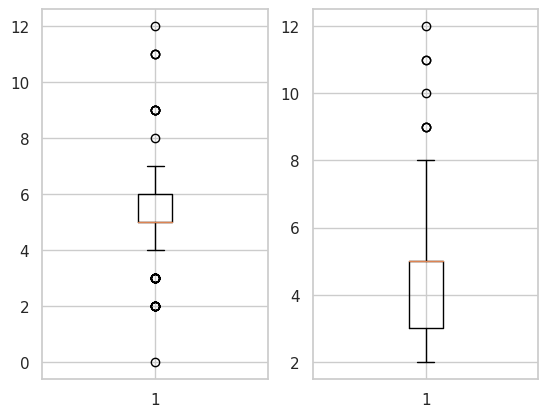

In [ ]:
fig, ax = plt.subplots(1, 2)

ax[0].boxplot(df.loc[df['PCOS (Y/N)'] == 0, 'Cycle length(days)'])
ax[1].boxplot(df.loc[df['PCOS (Y/N)'] == 1, 'Cycle length(days)'])

plt.show()

In [ ]:
df = df.drop('Cycle length(days)', axis=1)

## Feature Engineering to No. of abortions

We try to check whether the distribution of people with abortions needs to be engineered or not

In [ ]:
df['No. of aborptions'].value_counts()

0    437
1     69
2     22
3     10
4      2
5      1
Name: No. of aborptions, dtype: int64

In [ ]:
df[['PCOS (Y/N)','No. of aborptions']].groupby('No. of aborptions').sum() / df[['PCOS (Y/N)','No. of aborptions']].groupby('No. of aborptions').count()

,PCOS (Y/N)
No. of aborptions,
0,0.334096
1,0.318841
2,0.363636
3,0.100000
4,0.000000
5,0.000000


## Feature Engineering to Age(yrs)

We check the possibilities of people at certain age to have PCOS. The result is below, and we decided to discretize the age range so that we will get more accurate results. We decided this because at some certain age, the possibilities of having PCOS is reaching 1.0 or **certain**, we assume that we are lacking of data but since we can't add more, we try to group them and make them discretized

In [ ]:
df[['PCOS (Y/N)','Age (yrs)']].groupby('Age (yrs)').sum() / df[['PCOS (Y/N)','Age (yrs)']].groupby('Age (yrs)').count()

,PCOS (Y/N)
Age (yrs),
20,0.000000
21,0.333333
22,0.625000
23,0.666667
24,0.533333
25,0.500000
26,0.250000
27,0.457143
28,0.400000


In [ ]:
bins = [20, 29, 39, 49]
labels = ['20s', '30s', '40s']

# Perform feature engineering by grouping ages into categories
df['age_category'] = pd.cut(df['Age (yrs)'], bins=bins, labels=labels).map({'20s':2,'30s':3,'40s':4})

# Print the updated DataFrame
print(df)

     PCOS (Y/N)  Age (yrs)        BMI  Blood Group  Cycle(R/I)  \
0             0         28  19.300000           15           2   
1             0         36  24.921163           15           2   
2             1         33  25.270891           11           2   
3             0         37  29.674945           13           2   
4             0         25  20.060954           11           2   
..          ...        ...        ...          ...         ...   
536           0         35  18.500000           17           2   
537           0         30  25.300000           15           2   
538           0         36  23.400000           13           2   
539           0         27  22.200000           15           4   
540           1         23  30.100000           13           4   

     Marraige Status (Yrs)  Pregnant(Y/N)  No. of aborptions  Waist:Hip Ratio  \
0                      7.0              0                  0         0.833333   
1                     11.0              1    

Now since the age_category is generated, we can drop the age column

In [ ]:
df = df.drop('Age (yrs)', axis=1)

##Feature Engineering on Marriage status

We do the same thing as we did to the age column. Here, we decided to discretize the columns by dividing it to some bins, that are <5 yrs, 5-10 yrs, 11-15 yrs, and >15 yrs

In [ ]:
df[['PCOS (Y/N)','Marraige Status (Yrs)']].groupby('Marraige Status (Yrs)').sum() / df[['PCOS (Y/N)','Marraige Status (Yrs)']].groupby('Marraige Status (Yrs)').count()

,PCOS (Y/N)
Marraige Status (Yrs),
0.0,0.000000
1.0,0.538462
1.5,0.400000
2.0,0.310345
2.2,1.000000
2.5,0.857143
3.0,0.411765
3.5,0.285714
4.0,0.346154


In [ ]:
bins = [0, 5, 10, 15,np.Inf]
labels = [1, 2, 3, 4]

# Perform feature engineering by grouping ages into categories
df['marriage_category'] = pd.cut(df['Marraige Status (Yrs)'], bins=bins, labels=labels)

# Print the updated DataFrame
df

,PCOS (Y/N),BMI,Blood Group,Cycle(R/I),Marraige Status (Yrs),Pregnant(Y/N),No. of aborptions,Waist:Hip Ratio,Weight gain(Y/N),hair growth(Y/N),Skin darkening (Y/N),Hair loss(Y/N),Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),age_category,marriage_category
0,0,19.300000,15,2,7.0,0,0,0.833333,0,0,0,0,0,1.0,0,2,2
1,0,24.921163,15,2,11.0,1,0,0.842105,0,0,0,0,0,0.0,0,3,3
2,1,25.270891,11,2,10.0,1,0,0.900000,0,0,0,1,1,1.0,0,3,2
3,0,29.674945,13,2,4.0,0,0,0.857143,0,0,0,0,0,0.0,0,3,1
4,0,20.060954,11,2,1.0,1,0,0.810811,0,0,0,1,0,0.0,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
536,0,18.500000,17,2,8.0,0,1,0.928571,0,0,0,0,0,0.0,0,3,2
537,0,25.300000,15,2,4.0,1,1,0.941176,1,0,0,0,0,0.0,0,3,1
538,0,23.400000,13,2,8.0,0,0,0.933333,0,0,0,0,0,0.0,0,3,2
539,0,22.200000,15,4,2.0,0,0,0.928571,0,0,0,0,1,0.0,0,2,1


In [ ]:
df[['marriage_category', 'Marraige Status (Yrs)']].groupby('marriage_category').mean()

,Marraige Status (Yrs)
marriage_category,
1,3.400467
2,7.893401
3,12.778947
4,19.352941


#Drop null (if any)

In [ ]:
df.dropna(inplace=True)

#Export the Cleaned and Ready-to-Use Dataset

In [ ]:
clean_data = df

In [ ]:
excel_file_path = '/content/PiCOS_cleaned_data_engineered.xlsx'

# Create an ExcelWriter object
excel_writer = pd.ExcelWriter(excel_file_path)

# Export the DataFrame to Excel
clean_data.to_excel(excel_writer, sheet_name='Sheet1', index=False)

# Save the Excel file
excel_writer.save()

<ipython-input-32-9e01b5e21c98>:10: FutureWarning: save is not part of the public API, usage can give unexpected results and will be removed in a future version
  excel_writer.save()


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 534 entries, 0 to 540
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   PCOS (Y/N)             534 non-null    int64   
 1   BMI                    534 non-null    float64 
 2   Blood Group            534 non-null    int64   
 3   Cycle(R/I)             534 non-null    int64   
 4   Marraige Status (Yrs)  534 non-null    float64 
 5   Pregnant(Y/N)          534 non-null    int64   
 6   No. of aborptions      534 non-null    int64   
 7   Waist:Hip Ratio        534 non-null    float64 
 8   Weight gain(Y/N)       534 non-null    int64   
 9   hair growth(Y/N)       534 non-null    int64   
 10  Skin darkening (Y/N)   534 non-null    int64   
 11  Hair loss(Y/N)         534 non-null    int64   
 12  Pimples(Y/N)           534 non-null    int64   
 13  Fast food (Y/N)        534 non-null    float64 
 14  Reg.Exercise(Y/N)      534 non-null    int